# Customer Segmentation Using K-Means Clustering on Retail Purchase Data

Identifying distinct customer groups based on annual income and spending behavior

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Load data

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Preprocessing (selecting relevant features for clustering)

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Feature Scaling (improves clustering performance)

In [4]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]
X


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Use Elbow Method to find optimal number of clusters (k)

In [5]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

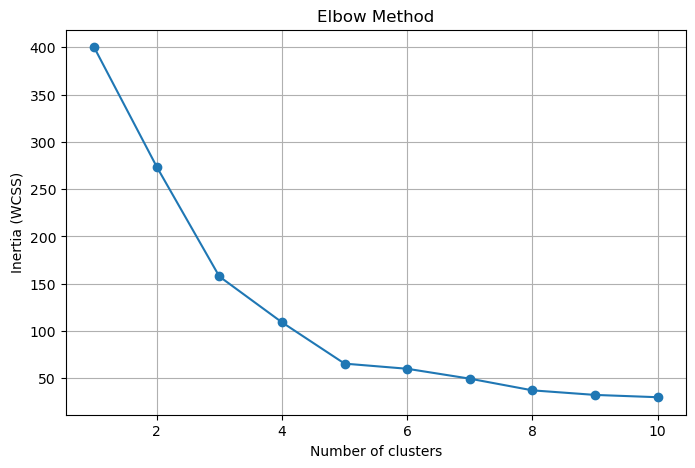

In [6]:
inertia=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
# Plot the Elbow Graph
plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)
plt.show()

Apply KMeans with optimal k (say, k=5)

In [17]:
k=5
kmeans =KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
#Add cluster labels to original data
df['Cluster'] = clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


Add cluster labels to original data

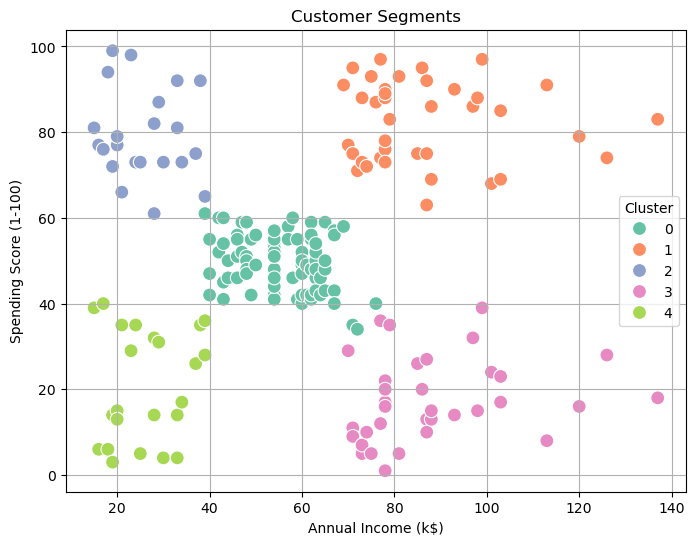

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x = 'Annual Income (k$)',
    y = 'Spending Score (1-100)',
    hue= 'Cluster',
    palette='Set2',
    data=df,
    s=100
    
)
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Saving the Model

In [21]:
import joblib
joblib.dump(kmeans, "kmeans_model.pkl")

['kmeans_model.pkl']